In [28]:
import pandas as pd
from pandas import read_excel
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt

In [25]:
crashes_hills = read_excel('hills.xlsx')
df_crash_hill = pd.DataFrame(crashes_hills)

from mlxtend.frequent_patterns import apriori
frequency_hill = apriori(df_crash_hill, min_support=0.08, use_colnames=True)

association_rules(frequency_hill, metric="confidence", min_threshold=0.08)
rules = association_rules(frequency_hill, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPEEDING),(AGGRESSIVE),0.128333,0.346667,0.128333,1.000000,2.884615,0.083844,inf
1,(AGGRESSIVE),(SPEEDING),0.346667,0.128333,0.128333,0.370192,2.884615,0.083844,1.384020
2,(INTERSECTION),(AGGRESSIVE),0.555000,0.346667,0.250000,0.450450,1.299376,0.057600,1.188852
3,(AGGRESSIVE),(INTERSECTION),0.346667,0.555000,0.250000,0.721154,1.299376,0.057600,1.595862
4,(AGGRESSIVE),(INJURY),0.346667,0.423333,0.148333,0.427885,1.010751,0.001578,1.007955
5,(INJURY),(AGGRESSIVE),0.423333,0.346667,0.148333,0.350394,1.010751,0.001578,1.005737
6,(INTERSECTION),(INJURY),0.555000,0.423333,0.235000,0.423423,1.000213,0.000050,1.000156
7,(INJURY),(INTERSECTION),0.423333,0.555000,0.235000,0.555118,1.000213,0.000050,1.000265
8,(SIGNAL),(INTERSECTION),0.150000,0.555000,0.150000,1.000000,1.801802,0.066750,inf
9,(INTERSECTION),(SIGNAL),0.555000,0.150000,0.150000,0.270270,1.801802,0.066750,1.164815


D:\Users\Administrator.USER-20170206GP\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
D:\Users\Administrator.USER-20170206GP\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


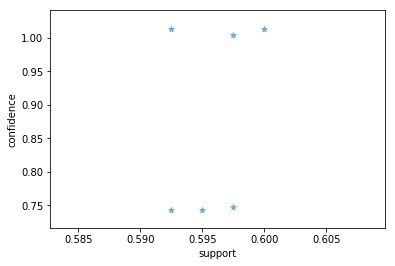

In [29]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()